# HW3 MNIST Dataset Analysis
Shaunak Bhide
EE399


In [1]:
#import cell
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD


In [2]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')
#MNIST_784 is 70000 x 784
#contains 700000 images with 784 feature vectors
# Convert X and y to numpy arrays
X = np.array(mnist.data / 255.0)  # Scale data to range [0, 1]

#reshape dataset to have images as column vectors
# 784 x 70000
X = X.T

#this code snippet reshapes image column vectors back into a 28x28 array so we can view it
# original_img = X[:, img_index].reshape(28, 28)
#will be using this later

In [3]:
# Perform SVD
# full_matrices=False indicates a truncated SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

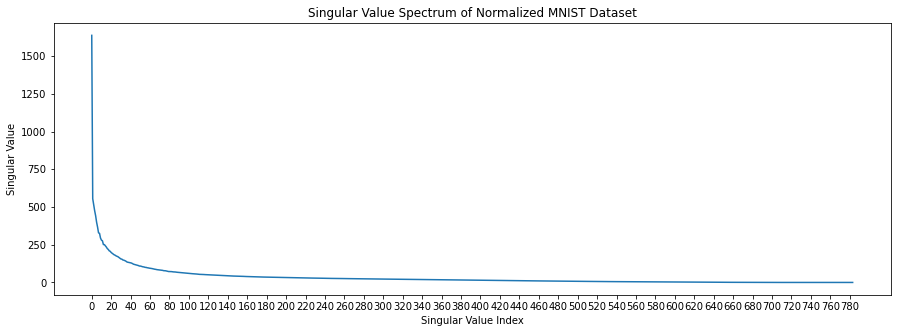

Number of modes necessary for 90% image reconstruction: 53


In [4]:
#2 What does the singular value spectrum look like? How many modes are necessary for good image reconstruction?
# (what is the rank of the digit space?)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(S)
ax.set_xlabel('Singular Value Index')
ax.set_ylabel('Singular Value')
ax.set_title('Singular Value Spectrum of Normalized MNIST Dataset')
ax.set_xticks(np.arange(0, len(S), 20))
ax.set_xticklabels(np.arange(0, len(S), 20))
plt.show()

# Determine how many modes are necessary for good image reconstruction
cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
threshold = 0.90
r = np.argmax(cumulative_energy >= threshold) + 1
print(f'Number of modes necessary for {threshold:.0%} image reconstruction: {r}')


3. We can interpret the **U**, **&Sigma;**, **V** matricies as follows.  

    - The **U** matrix contains images in the dataset. Each column of **U** is a different image, and each entry down the column represents the contribution of each principal component to that image.  

    - The **&Sigma;** matrix is a diagonal matrix indicating the weights of each principal component. It is arranged in descending order. So in this case, the values in the **&Sigma;** matrix tell us how important each principal component is to all the images in the set. These singular values are graphed above, and we can see that there is a steep dropoff in relevance after the first 50-60 principal components. This tells us that we can reliably reconstruct images using only the first 50-60 principal components.  

    - The **V** matrix is structured such that each row is a principal component, and each entry across the row represents how each pixel contributes to a given principal component.  



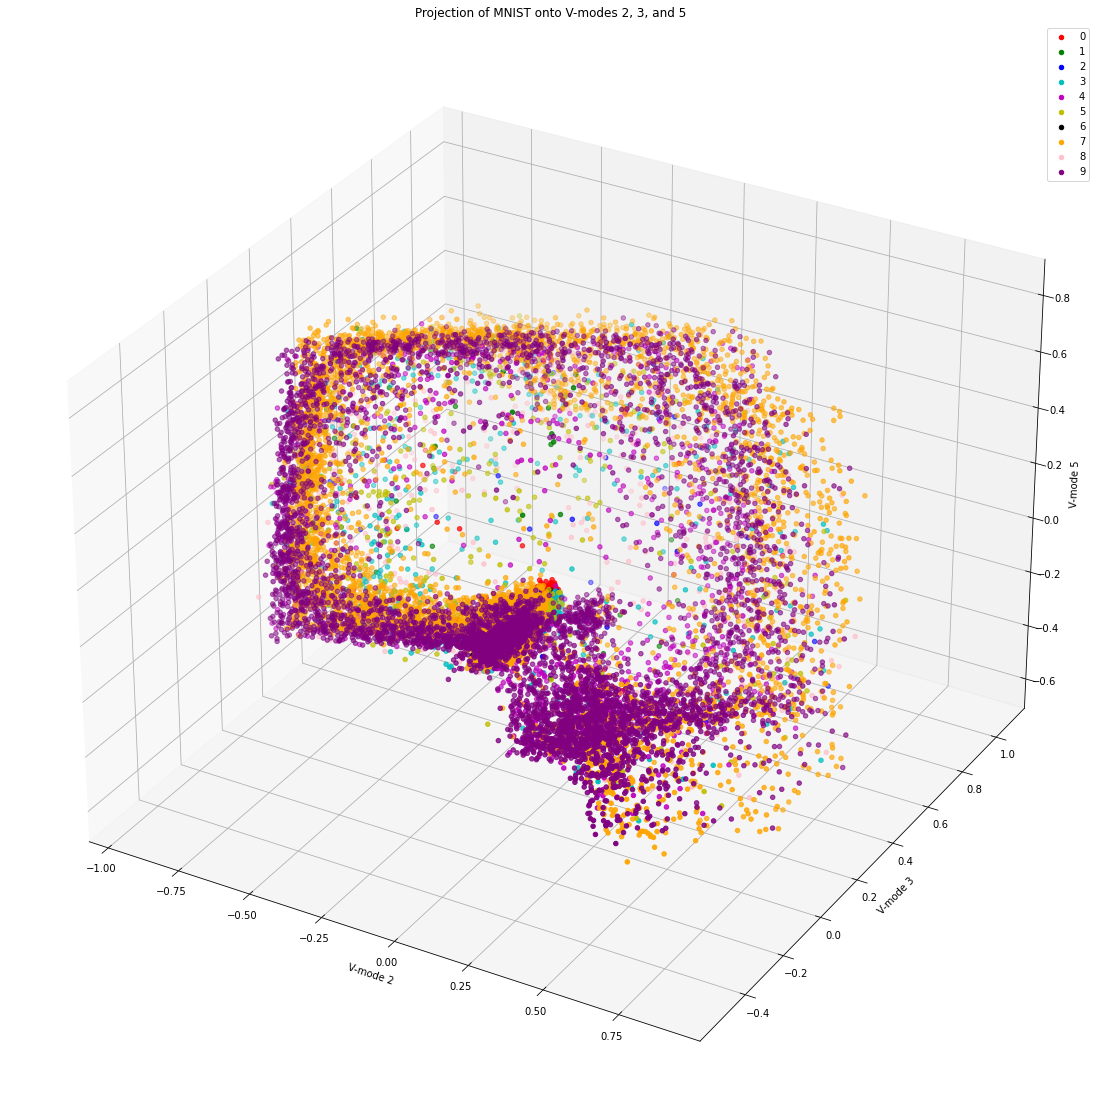

In [5]:
# Select three columns of V
V_select = Vt[:, [1, 2, 4]]
# Project X_reshaped onto the selected V-modes
X_proj = (X.T @ V_select)

# Color the points by their digit label
y = np.array(mnist.target)
unique_vals = np.unique(y)

colors = ["r", "g", "b", "c", "m", "y", "k", "orange", "pink", "purple"]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# Plotting
for i, val in enumerate(unique_vals):
    indices = np.where(y == val)[0]
    ax.scatter3D(X_proj[indices, 0], X_proj[indices, 1], X_proj[indices, 2], color=colors[i], label=str(val))

ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
ax.set_title('Projection of MNIST onto V-modes 2, 3, and 5')
ax.legend()
plt.show()

In [43]:
#import cell for HW3 part 2! Focusing on the sklearn package to create LDAs, SVDs, and decision trees
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [29]:
# Select only the digits 1 and 5

X = mnist.data[(mnist.target == '1') | (mnist.target == '5')]
y = mnist.target[(mnist.target == '1') | (mnist.target == '5')]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear classifier using LDA
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)
# Evaluate the classifier on the training set
accuracy_train = lda.score(X_train, y_train) * 100
print(f"Training Set Accuracy: {accuracy_train:.2f}%")

# Evaluate the classifier on the testing set
accuracy = lda.score(X_test, y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Training Set Accuracy: 99.15%
Test Accuracy: 98.80%


In [28]:
# Select 1, 5, 7

X = mnist.data[(mnist.target == '1') | (mnist.target == '5') | (mnist.target == '7')]
y = mnist.target[(mnist.target == '1') | (mnist.target == '5') | (mnist.target == '7')]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear classifier using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_train = lda.score(X_train, y_train) * 100
print(f"Training Set Accuracy: {accuracy_train:.2f}%")

# Evaluate the classifier on the testing set
accuracy = lda.score(X_test, y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Training Set Accuracy: 98.17%
Test Accuracy: 97.37%


In [40]:

from itertools import combinations
# Convert data and targets to numpy arrays
X = np.array(mnist.data)
y = np.array(mnist.target)

# Iterate over all pairs of digits
digit_pairs = list(combinations(range(10), 2))
test_accuracies = []
train_accuracies = []
for pair in digit_pairs:
    # Select only the current pair of digits
    indices = np.where((y == str(pair[0])) | (y == str(pair[1])))[0]
    X_pair = X[indices]
    y_pair = y[indices]

    # Convert the labels to binary: 0 for the first digit and 1 for the second digit
    y_pair = np.array([0 if label == str(pair[0]) else 1 for label in y_pair])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)

    # Train a linear classifier using LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Evaluate the classifier on the training and testing sets
    train_accuracy = lda.score(X_train, y_train) * 100
    test_accuracy = lda.score(X_test, y_test) * 100

    # Print the training and testing accuracies for the current pair of digits
    print(f"Digits {pair}: Training accuracy = {train_accuracy:.2f}, Testing accuracy = {test_accuracy:.2f}")

    # Record the training and testing accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Find the maximum and minimum testing accuracies and their corresponding digit pairs
max_test_accuracy = max(test_accuracies)
max_test_pair = digit_pairs[test_accuracies.index(max_test_accuracy)]
min_test_accuracy = min(test_accuracies)
min_test_pair = digit_pairs[test_accuracies.index(min_test_accuracy)]

# Print the maximum and minimum testing accuracies and their corresponding digit pairs
print(f"Maximum testing accuracy: {max_test_accuracy:.2f} (Digits {max_test_pair})")
print(f"Minimum testing accuracy: {min_test_accuracy:.2f} (Digits {min_test_pair})")


Digits (0, 1): Training accuracy = 99.48, Testing accuracy = 99.53
Digits (0, 2): Training accuracy = 98.81, Testing accuracy = 98.63
Digits (0, 3): Training accuracy = 99.45, Testing accuracy = 98.83
Digits (0, 4): Training accuracy = 99.68, Testing accuracy = 99.38
Digits (0, 5): Training accuracy = 98.86, Testing accuracy = 98.49
Digits (0, 6): Training accuracy = 99.27, Testing accuracy = 98.62
Digits (0, 7): Training accuracy = 99.67, Testing accuracy = 99.40
Digits (0, 8): Training accuracy = 98.91, Testing accuracy = 98.69
Digits (0, 9): Training accuracy = 99.50, Testing accuracy = 98.74
Digits (1, 2): Training accuracy = 98.61, Testing accuracy = 98.15
Digits (1, 3): Training accuracy = 99.03, Testing accuracy = 98.17
Digits (1, 4): Training accuracy = 99.69, Testing accuracy = 99.42
Digits (1, 5): Training accuracy = 99.15, Testing accuracy = 98.80
Digits (1, 6): Training accuracy = 99.67, Testing accuracy = 99.09
Digits (1, 7): Training accuracy = 99.30, Testing accuracy = 9

In [51]:
# Preprocess the dataset
X = mnist.data / 255.0
y = mnist.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Scale the feature values between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SVM

# Train an SVM classifier on the training set
clf_svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
clf_svm.fit(X_train, y_train)

# Evaluate the performance of the SVM on the testing set
y_pred_svm = clf_svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {accuracy_test_svm:.2f}%")

#Decision Tree
# Train a decision tree classifier on the training set
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Evaluate the performance of the decision tree on the testing set
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree) * 100
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}%")

#LDA 

# Train an LDA classifier on the training set
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Evaluate the performance of the LDA on the testing set
y_pred_lda = clf.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda) * 100
print(f"LDA Accuracy: {accuracy_lda:.2f}%")


SVM Accuracy: 98.02%
Decision Tree Accuracy: 87.40%
LDA Accuracy: 86.69%


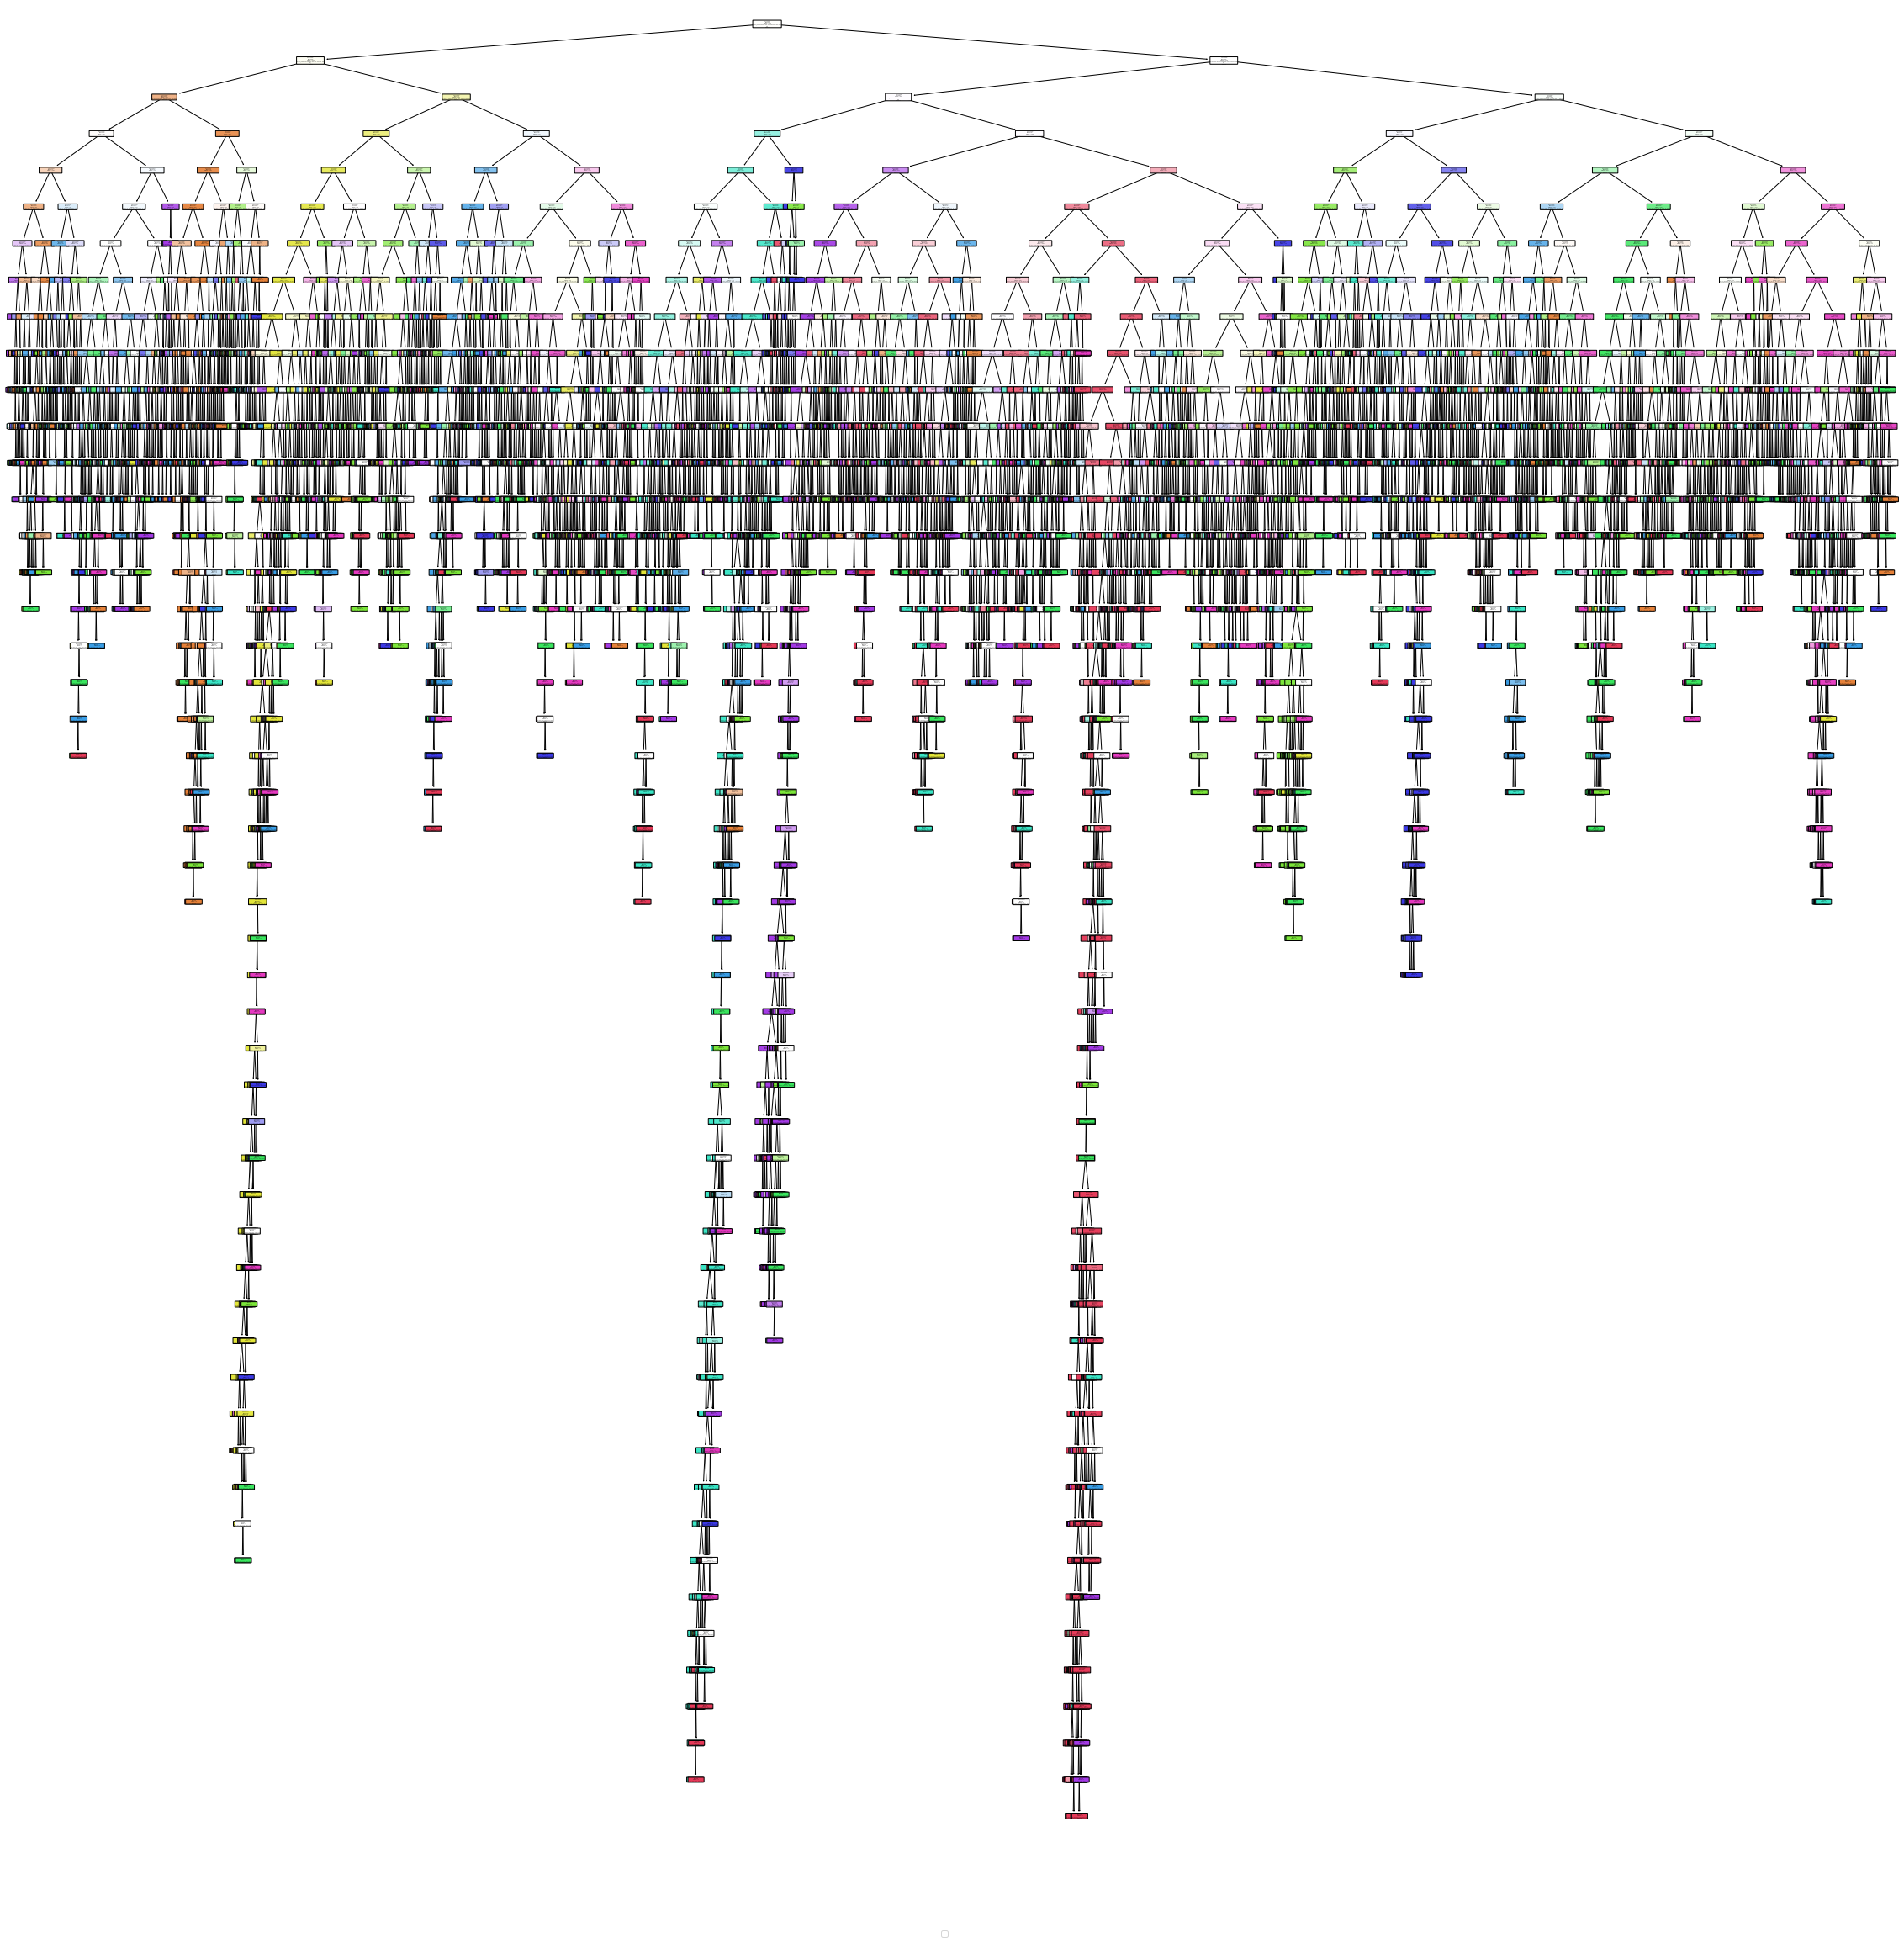

In [58]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(40,40))
plot_tree(clf_tree, filled=True, rounded=True, class_names=[str(i) for i in range(10)],
          feature_names=[str(i) for i in range(784)])

# Define the legend labels
legend_labels = [f"Class {i}: {np.sum(y_train == i)} samples" for i in range(10)]

# Add the legend to the plot
plt.legend(legend_labels, loc='best', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Show the plot
plt.show()